In [1]:
import glob
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# 폴더 경로 지정
folder_path = r'C:\Users\pc\Desktop\CNN\CIC-AndMal2017'

In [2]:
# 랜섬웨어 클래스별 파일에 있는 샘플 개수를 확인하기 위한 딕셔너리
samples_per_class = {}

# Ransomware 폴더 내의 10개 폴더 경로 리스트 받아오기
ransomware_folder_list = glob.glob(folder_path + '\\Ransomware\\*')

# 모든 파일 로드 및 샘플 개수 확인
for folder in ransomware_folder_list:
    ransomware_class = folder.split('\\')[-1]  # 랜섬웨어 클래스명 추출

    file_paths = glob.glob(folder + '\\*.csv')
    total_samples = 0  # 클래스별 전체 샘플 개수 초기화
    for file_path in file_paths:
        data = pd.read_csv(file_path)
        total_samples += data.shape[0]  # 데이터프레임의 행 수 / 샘플 개수 더하기

    samples_per_class[ransomware_class] = total_samples

# 클래스별 샘플 개수 출력
for ransomware_class, num_samples in samples_per_class.items():
    print(f"{ransomware_class} 클래스의 샘플 개수: {num_samples}")

Charger 클래스의 샘플 개수: 39551
Jisut 클래스의 샘플 개수: 25672
Koler 클래스의 샘플 개수: 44555
Lockerpin 클래스의 샘플 개수: 25307
Pletor 클래스의 샘플 개수: 4715
PornDroid 클래스의 샘플 개수: 46082
RansomBO 클래스의 샘플 개수: 39859
Simplocker 클래스의 샘플 개수: 36340
SVpeng 클래스의 샘플 개수: 54161
WannaLocker 클래스의 샘플 개수: 32701


In [3]:
benign_folder_path = r'C:\Users\pc\Desktop\CNN\CIC-AndMal2017\Benign'

# 'Benign' 클래스의 파일 경로 리스트 받아오기
benign_file_paths = glob.glob(benign_folder_path + '/*.csv')

# 'Benign' 클래스의 데이터프레임 초기화
benign_data = pd.DataFrame()

# 'Benign' 클래스의 모든 파일 로드
for file_path in benign_file_paths:
    data = pd.read_csv(file_path)
    benign_data = pd.concat([benign_data, data], ignore_index=True)

# 'Benign' 클래스에서 160,000개 무작위 샘플 추출
num_samples_benign = 160000
labels = []

if len(benign_data) > num_samples_benign:
    train_benign_subset = benign_data.sample(n=num_samples_benign, random_state=42)
else:
    train_benign_subset = benign_data.copy()

# Benign 데이터의 라벨을 labels 리스트에 추가
labels.extend(train_benign_subset[' Label'].tolist())

print("train_benign_subset의 샘플 개수:", len(train_benign_subset))

train_benign_subset의 샘플 개수: 160000


In [4]:
ransomware_folder_list = glob.glob(folder_path + '\\Ransomware\\*')
all_ransomware_data = pd.DataFrame()

for ransomware_folder_path in ransomware_folder_list:
    ransomware_file_paths = glob.glob(ransomware_folder_path + '/*.csv')
    
    # 각 랜섬웨어 클래스의 모든 파일 로드
    for file_path in ransomware_file_paths:
        data = pd.read_csv(file_path)
        all_ransomware_data = pd.concat([all_ransomware_data, data], ignore_index=True)

# 전체 랜섬웨어 데이터에서 160,000개 샘플 무작위로 추출
if len(all_ransomware_data) > 160000:
    train_ransomware_subset = all_ransomware_data.sample(n=160000, random_state=42, replace=False)
else:
    train_ransomware_subset = all_ransomware_data.copy()

# 랜섬웨어 데이터의 라벨을 labels 리스트에 추가
labels.extend(train_ransomware_subset[' Label'].tolist())

print("train_ransomware_subset의 샘플 개수:", len(train_ransomware_subset))

train_ransomware_subset의 샘플 개수: 160000


In [6]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
train_dataset = pd.concat([train_benign_subset, train_ransomware_subset], ignore_index=True)

print("최종 train 데이터세트의 샘플 개수:", len(train_dataset))

최종 train 데이터세트의 샘플 개수: 320000


In [7]:
# 타깃 변수 열 이름 확인
target_variable = ' Label'  # 실제 타깃 변수 열 이름으로 수정

# X와 y로 데이터 분할
y = train_dataset[target_variable]  # 타깃 변수
X = train_dataset.drop([target_variable], axis=1)  # 타깃 변수 제외한 나머지 특성

# 불필요한 특성 제거
unnecessary_features = ['Flow ID', ' Timestamp', ' Source IP', ' Destination IP']
X = X.drop(unnecessary_features, axis=1)

# NaN 값을 0으로 대체
X = X.fillna(0)

# 각 열(feature)에 Min-Max 스케일링 적용
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 결과 출력
print(X_scaled)

         Source Port   Destination Port   Protocol   Flow Duration  \
0           0.592166           0.000811   1.000000        0.000794   
1           0.758065           0.001224   0.352941        0.002154   
2           0.564211           0.006780   0.352941        0.085388   
3           0.739433           0.001224   0.352941        0.004174   
4           0.720954           0.006780   0.352941        0.024747   
...              ...                ...        ...             ...   
319995      0.915906           0.006780   0.352941        0.106555   
319996      0.856990           0.001224   0.352941        0.032064   
319997      0.885907           0.006780   0.352941        0.103050   
319998      0.526490           0.001224   0.352941        0.033418   
319999      0.726371           0.006780   0.352941        0.003486   

         Total Fwd Packets   Total Backward Packets  \
0                 0.000000                 0.000067   
1                 0.000000                 0.0000

In [8]:
# 각 행의 마지막에 0 값을 추가합니다.
X_padded = np.pad(X_scaled.values, ((0, 0), (0, 1)), mode='constant', constant_values=0)

# 9x9로 리쉐이핑합니다.
num_rows = 9
num_columns = 9
X_reshaped = X_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("9x9 크기의 2차원 행렬:")
print(X_reshaped[0])  # 첫 번째 샘플에 해당하는 9x9 행렬 출력

9x9 크기의 2차원 행렬:
[[5.92165899e-01 8.11178964e-04 1.00000000e+00 7.94301774e-04
  0.00000000e+00 6.70690812e-05 4.00783933e-06 4.79270392e-06
  1.92383583e-03]
 [2.67123288e-02 1.32090790e-02 0.00000000e+00 7.90362185e-03
  7.05479452e-02 7.05479452e-02 0.00000000e+00 1.12435149e-05
  1.04829678e-05]
 [7.94961759e-04 0.00000000e+00 7.94961759e-04 7.95120099e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.93128604e-01 9.99151869e-01 5.24146129e-06 1.04913080e-05
  3.29391892e-02 5.08089976e-03 4.29520645e-02 1.40823008e-02
  1.98311196e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.84615385e-02]
 [5.09572072e-02 1.32090790e-02 7.05479452e-02 9.93128604e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [9]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Train_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 160000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [10]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Train_Image\\'

X_data = []
y_labels = []

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_data.append(image)
        y_labels.append(label_int)

X_data = np.array(X_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장
y_labels = np.array(y_labels)

Label 0 has 160000 samples
Label 1 has 160000 samples
Showing images for label: Benign


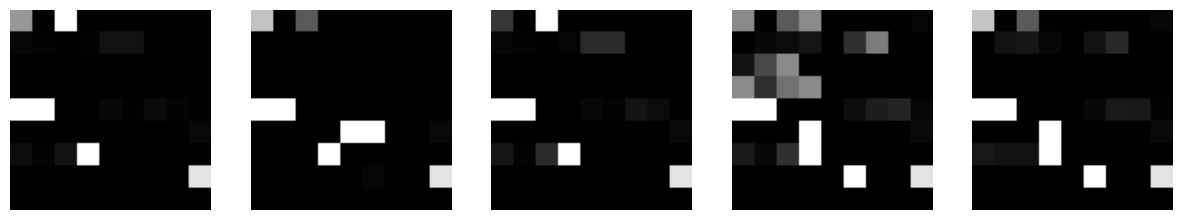

Showing images for label: Ransomware


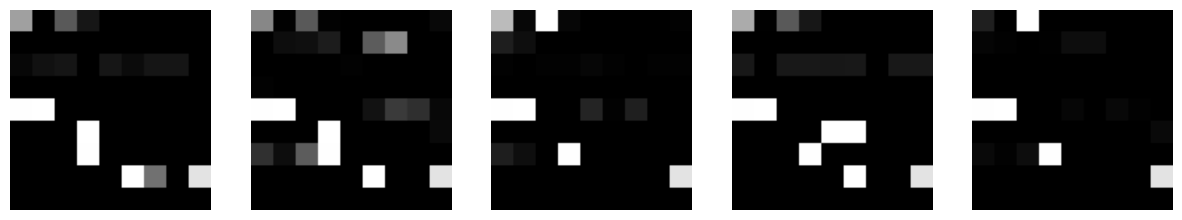

In [11]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 라벨의 분포를 확인합니다.
label_counts = Counter(y_labels)
for label, count in label_counts.items():
    print(f"Label {label} has {count} samples")

# 라벨별로 이미지 몇 개를 시각화합니다.
num_images_to_show = 5  # 시각화할 이미지의 수를 설정합니다.

for label in label_mapping:
    print(f"Showing images for label: {label}")
    indices = [i for i, l in enumerate(y_labels) if l == label_mapping[label]]
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
    for ax, idx in zip(axes, indices[:num_images_to_show]):
        ax.imshow(X_data[idx], cmap='gray')  # 16비트 이미지이므로 cmap='gray'를 사용합니다.
        ax.axis('off')
    plt.show()

In [12]:
# train_benign_subset에 포함되지 않은 데이터 선택
validation_data_candidate = benign_data.drop(train_benign_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_validation = 20000
if len(validation_data_candidate) > num_samples_validation:
    validation_benign_subset = validation_data_candidate.sample(n=num_samples_validation, random_state=42)
else:
    validation_benign_subset = validation_data_candidate.copy()

print("validation_benign_subset의 샘플 개수:", len(validation_benign_subset))

validation_benign_subset의 샘플 개수: 20000


In [13]:
# train_ransomware_subset에 포함되지 않은 랜섬웨어 데이터 선택
validation_ransomware_candidate = all_ransomware_data.drop(train_ransomware_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_validation_ransomware = 20000
if len(validation_ransomware_candidate) > num_samples_validation_ransomware:
    validation_ransomware_subset = validation_ransomware_candidate.sample(n=num_samples_validation_ransomware, random_state=42)
else:
    validation_ransomware_subset = validation_ransomware_candidate.copy()

print("validation_ransomware_subset의 샘플 개수:", len(validation_ransomware_subset))

validation_ransomware_subset의 샘플 개수: 20000


In [15]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
validation_dataset = pd.concat([validation_benign_subset, validation_ransomware_subset], ignore_index=True)

print("최종 validation 데이터세트의 샘플 개수:", len(validation_dataset))

최종 validation 데이터세트의 샘플 개수: 40000


In [16]:
# 타깃 변수 열 이름 확인
target_variable = ' Label'  # 실제 타깃 변수 열 이름으로 수정

# X와 y로 데이터 분할
y_validation = validation_dataset[target_variable]  # 타깃 변수
X_validation = validation_dataset.drop([target_variable], axis=1)  # 타깃 변수 제외한 나머지 특성

# 불필요한 특성 제거
unnecessary_features = ['Flow ID', ' Timestamp', ' Source IP', ' Destination IP']
X_validation = X_validation.drop(unnecessary_features, axis=1)

# NaN 값을 0으로 대체
X_validation = X_validation.fillna(0)

# 각 열(feature)에 Min-Max 스케일링 적용
# 이미 학습 데이터에서 스케일링을 했다면 동일한 스케일러를 사용하여 변환합니다.
X_validation_scaled = pd.DataFrame(scaler.transform(X_validation), columns=X_validation.columns)

# 결과 출력
print(X_validation_scaled)

# 각 행의 마지막에 0 값을 추가합니다.
X_validation_padded = np.pad(X_validation_scaled.values, ((0, 0), (0, 1)), mode='constant', constant_values=0)

# 9x9로 리쉐이핑합니다.
num_rows = 9
num_columns = 9
X_validation_reshaped = X_validation_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("\n9x9 크기의 2차원 행렬:")
print(X_validation_reshaped[0])  # 첫 번째 샘플에 해당하는 9x9 행렬 출력

        Source Port   Destination Port   Protocol   Flow Duration  \
0          0.683813           0.001224   0.352941    1.875931e-02   
1          0.628208           0.001224   0.352941    1.593764e-01   
2          0.006760           0.556882   0.352941    1.796671e-05   
3          0.416807           0.000811   1.000000    5.113761e-04   
4          0.000000           0.000000   0.000000    7.125118e-01   
...             ...                ...        ...             ...   
39995      0.634053           0.000811   1.000000    2.059838e-04   
39996      0.776406           0.006780   0.352941    6.833349e-07   
39997      0.985733           0.000811   1.000000    1.037502e-05   
39998      0.707419           0.612226   1.000000    1.922588e-03   
39999      0.017487           0.000811   1.000000    2.195455e-03   

        Total Fwd Packets   Total Backward Packets  \
0                0.001485                 0.000872   
1                0.000297                 0.000067   
2        

In [18]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Validation_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_validation_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_validation_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 20000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [19]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Validation_Image\\'  # Modified path to "Validation_Image"

X_val_data = []  # Changed variable name to X_val_data for clarity
y_val_labels = []  # Changed variable name to y_val_labels for clarity

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_val_data.append(image)  # Changed variable name
        y_val_labels.append(label_int)  # Changed variable name

X_val_data = np.array(X_val_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장, changed variable name
y_val_labels = np.array(y_val_labels)  # Changed variable name

Label 0 has 20000 samples
Label 1 has 20000 samples
Showing images for label: Benign


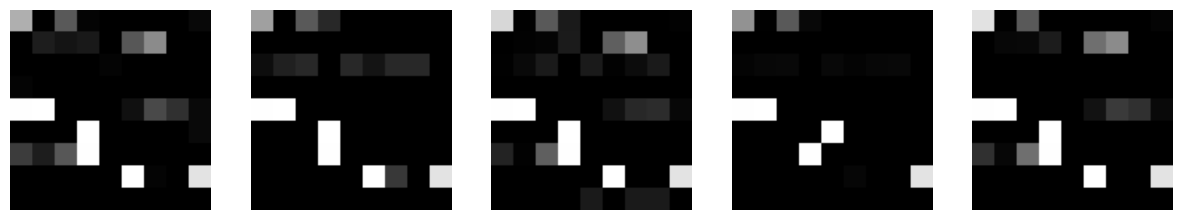

Showing images for label: Ransomware


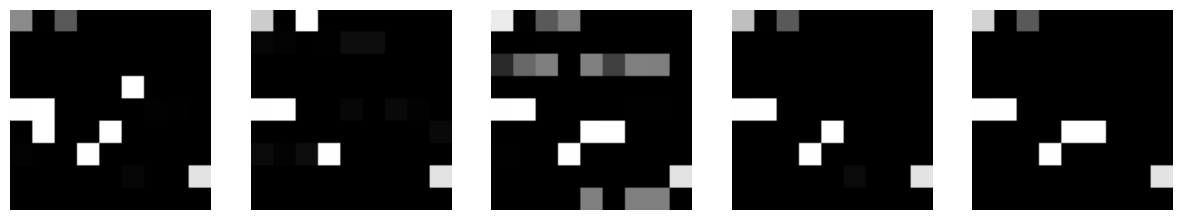

In [20]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 라벨의 분포를 확인합니다.
label_counts = Counter(y_val_labels)
for label, count in label_counts.items():
    print(f"Label {label} has {count} samples")

# 라벨별로 이미지 몇 개를 시각화합니다.
num_images_to_show = 5  # 시각화할 이미지의 수를 설정합니다.

for label in label_mapping:
    print(f"Showing images for label: {label}")
    indices = [i for i, l in enumerate(y_val_labels) if l == label_mapping[label]]
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
    for ax, idx in zip(axes, indices[:num_images_to_show]):
        ax.imshow(X_val_data[idx], cmap='gray')  # 16비트 이미지이므로 cmap='gray'를 사용합니다.
        ax.axis('off')
    plt.show()


In [21]:
# train_benign_subset 및 validation_benign_subset에 포함되지 않은 데이터 선택
test_data_candidate = benign_data.drop(train_benign_subset.index).drop(validation_benign_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_test = 20000
if len(test_data_candidate) > num_samples_test:
    test_benign_subset = test_data_candidate.sample(n=num_samples_test, random_state=42)
else:
    test_benign_subset = test_data_candidate.copy()

print("test_benign_subset의 샘플 개수:", len(test_benign_subset))

test_benign_subset의 샘플 개수: 20000


In [22]:
# validation_ransomware_subset에 포함되지 않은 랜섬웨어 데이터 선택
test_ransomware_candidate = validation_ransomware_candidate.drop(validation_ransomware_subset.index)

# 선택된 데이터 중에서 20,000개를 무작위로 선택
num_samples_test_ransomware = 20000
if len(test_ransomware_candidate) > num_samples_test_ransomware:
    test_ransomware_subset = test_ransomware_candidate.sample(n=num_samples_test_ransomware, random_state=42)
else:
    test_ransomware_subset = test_ransomware_candidate.copy()

print("test_ransomware_subset의 샘플 개수:", len(test_ransomware_subset))

test_ransomware_subset의 샘플 개수: 20000


In [24]:
# 'Benign' 클래스와 랜섬웨어 클래스의 데이터프레임들을 합치기
test_dataset = pd.concat([test_benign_subset, test_ransomware_subset], ignore_index=True)

print("최종 test 데이터세트의 샘플 개수:", len(test_dataset))

최종 test 데이터세트의 샘플 개수: 40000


In [25]:
# 타깃 변수 열 이름 확인
target_variable = ' Label'  # 실제 타깃 변수 열 이름으로 수정

# X와 y로 데이터 분할
y_test = test_dataset[target_variable]  # 타깃 변수
X_test = test_dataset.drop([target_variable], axis=1)  # 타깃 변수 제외한 나머지 특성

# 불필요한 특성 제거
unnecessary_features = ['Flow ID', ' Timestamp', ' Source IP', ' Destination IP']
X_test = X_test.drop(unnecessary_features, axis=1)

# NaN 값을 0으로 대체
X_test = X_test.fillna(0)

# 각 열(feature)에 Min-Max 스케일링 적용
# 이미 학습 데이터에서 스케일링을 했다면 동일한 스케일러를 사용하여 변환합니다.
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 결과 출력
print(X_test_scaled)

# 각 행의 마지막에 0 값을 추가합니다.
X_test_padded = np.pad(X_test_scaled.values, ((0, 0), (0, 1)), mode='constant', constant_values=0)

# 9x9로 리쉐이핑합니다.
num_rows = 9
num_columns = 9
X_test_reshaped = X_test_padded.reshape(-1, num_rows, num_columns)

# 결과 출력
print("\n9x9 크기의 2차원 행렬:")
print(X_test_reshaped[0])  # 첫 번째 샘플에 해당하는 9x9 행렬 출력

        Source Port   Destination Port   Protocol   Flow Duration  \
0          0.806436           0.006780   0.352941        0.021405   
1          0.774148           0.006780   0.352941        0.087383   
2          0.493210           0.000811   1.000000        0.000009   
3          0.875622           0.006780   1.000000        0.004156   
4          0.701178           0.001224   0.352941        0.084303   
...             ...                ...        ...             ...   
39995      0.599216           0.001224   0.352941        0.005886   
39996      0.605335           0.006780   0.352941        0.000002   
39997      0.704367           0.006780   0.352941        0.016651   
39998      0.570360           0.000811   1.000000        0.002958   
39999      0.525376           0.006780   0.352941        0.000132   

        Total Fwd Packets   Total Backward Packets  \
0                0.001634                 0.000805   
1                0.001337                 0.000537   
2        

In [26]:
from PIL import Image
import os

# 이미지를 저장할 폴더를 생성합니다.
save_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Test_Image\\'
os.makedirs(os.path.join(save_folder, "Benign"), exist_ok=True)
os.makedirs(os.path.join(save_folder, "Ransomware"), exist_ok=True)

# 이미지 확대 비율 설정
resize_factor = 10  # 10배 확대

# X_final_reshaped를 이미지로 변환하여 저장합니다.
num_samples = X_test_reshaped.shape[0]
for i in range(num_samples):
    # 1채널 16비트 PNG 이미지 생성
    image_data = X_test_reshaped[i]
    image_data = (image_data * 65535).astype('uint16')  # 16비트로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환

    # 이미지 데이터 확대
    image_data = np.repeat(image_data, resize_factor, axis=0)  # 행 확대
    image_data = np.repeat(image_data, resize_factor, axis=1)  # 열 확대
    
    # 확대된 데이터를 다시 이미지로 변환
    image = Image.fromarray(image_data, 'I;16')  # 16비트 단일 채널 이미지로 변환
    
    # 이미지의 라벨에 따라서 저장 위치 및 파일명 설정
    if i < 20000:
        label = "Benign"
    else:
        label = "Ransomware"

    image_filename = f"image_{i}.png"
    image_filepath = os.path.join(save_folder, label, image_filename)

    # 해당 경로에 이미지가 이미 존재하는 경우 건너뛴다.
    if os.path.exists(image_filepath):
        continue

    image.save(image_filepath)

print("이미지 변환 및 저장이 완료되었습니다.")

이미지 변환 및 저장이 완료되었습니다.


In [27]:
import os
import cv2
import numpy as np

# 라벨 목록 및 해당 라벨에 대한 정수 값 지정
label_mapping = {
    "Benign": 0,
    "Ransomware": 1
}

# 이미지 데이터를 저장한 폴더 경로
image_folder = r'C:\Users\pc\Desktop\CNN\All_feature_binary_CNN\Test_Image\\'  # Modified path to "Test_Image"

X_test_data = []  # Changed variable name to X_test_data for clarity
y_test_labels = []  # Changed variable name to y_test_labels for clarity

# 모든 라벨마다 폴더를 순회합니다.
for label_str, label_int in label_mapping.items():
    folder_path = os.path.join(image_folder, label_str)  # 해당 라벨의 폴더 경로
    
    # 해당 폴더 내의 모든 이미지 파일을 순차적으로 처리
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        # 16-bit 이미지 로딩
        image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        
        if image is None:  # 이미지 로딩 실패
            print(f"Failed to load image at path: {image_path}")
            continue
        
        X_test_data.append(image)  # Changed variable name
        y_test_labels.append(label_int)  # Changed variable name

X_test_data = np.array(X_test_data, dtype=np.uint16)  # uint16 형태로 이미지 데이터 저장, changed variable name
y_test_labels = np.array(y_test_labels)  # Changed variable name